In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('NVDA.csv')

### Understanding the data

In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-09,44.273998,44.312000,42.133999,42.554001,42.541264,586449000
1,2023-08-10,42.160000,43.574001,41.834999,42.388000,42.375317,492705000
2,2023-08-11,41.750999,42.018002,40.639000,40.855000,40.842773,533085000
3,2023-08-14,40.486000,43.799999,40.311001,43.752998,43.739902,690286000
4,2023-08-15,44.560001,45.268002,43.709999,43.939999,43.926846,676512000


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,74.153377,75.508516,72.571246,74.106294,74.098873,4.605192e+08
std,29.459220,30.098623,28.543601,29.295587,29.298317,1.518582e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.739110e+08
25%,46.999001,47.722251,46.152750,46.948751,46.938566,3.714018e+08
50%,68.974499,69.986999,67.402500,69.392002,69.383049,4.338830e+08
75%,92.119999,93.614998,89.802747,92.224748,92.217173,5.241585e+08
max,139.800003,140.759995,132.419998,135.580002,135.580002,1.156044e+09


In [5]:
# Checking for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [7]:
df.info()  #To understand data types and counts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-08-09 to 2024-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


#### Basic Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

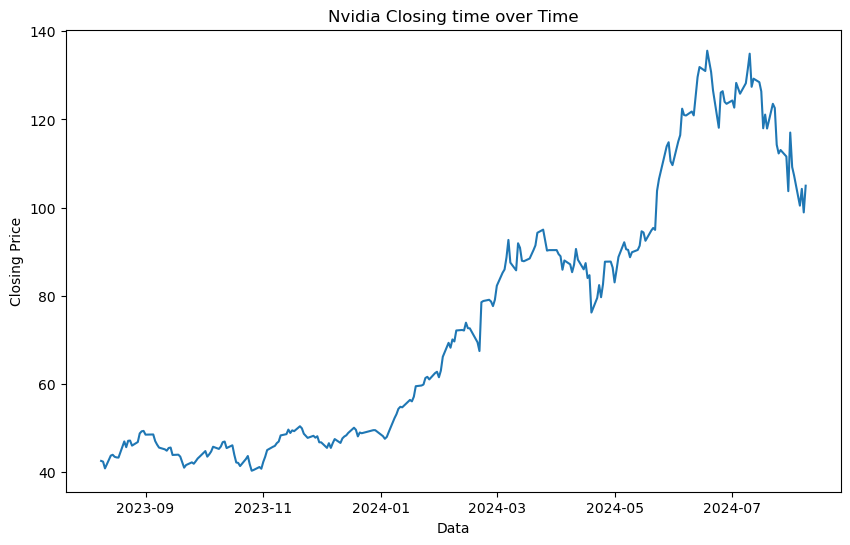

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df['Close'])
plt.title('Nvidia Closing time over Time')
plt.xlabel('Data')
plt.ylabel('Closing Price')
plt.show

In [9]:
# Resample the data by month, taking the last closing price of each month
monthly_close = df['Close'].resample('M').last()

# Calculate the highest price for each month
monthly_high = df['High'].resample('M').max()


In [10]:
# Create a new DataFrame with the monthly close and high prices
monthly_data = pd.DataFrame({
    'Monthly Close': monthly_close,
    'Monthly High': monthly_high
})


In [11]:
monthly_data

,Monthly Close,Monthly High
Date,,
2023-08-31,49.355000,50.265999
2023-09-30,43.499001,49.799999
2023-10-31,40.779999,47.609001
2023-11-30,46.770000,50.548000
2023-12-31,49.521999,50.432999
2024-01-31,61.527000,63.493000
2024-02-29,79.112000,82.393997
2024-03-31,90.356003,97.400002
2024-04-30,86.402000,92.224998


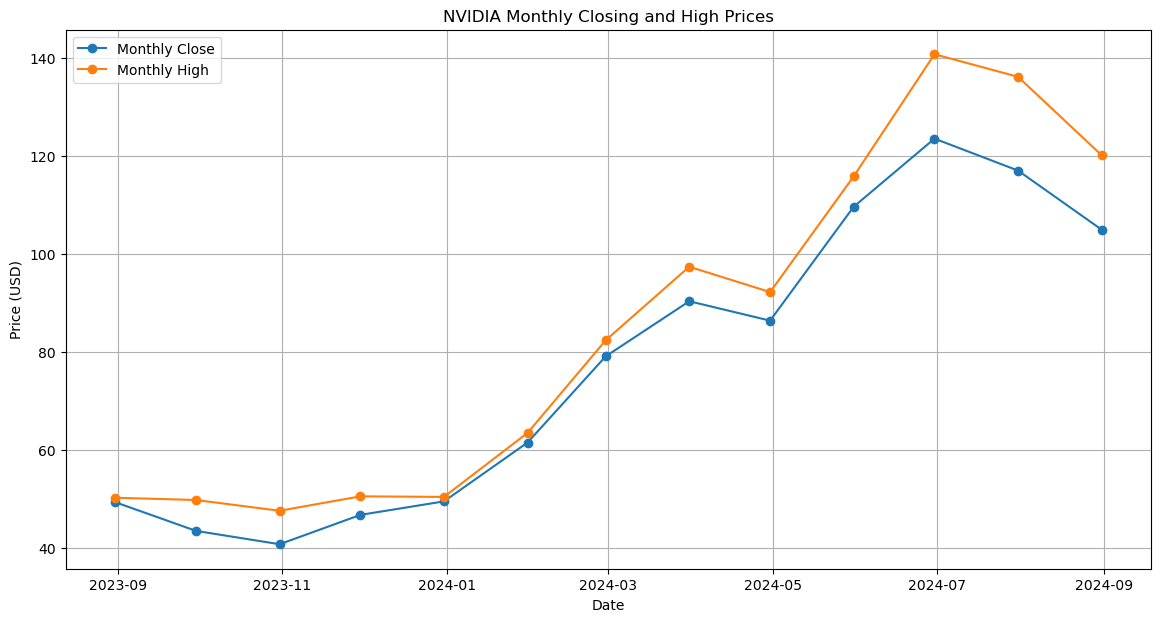

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Monthly Close'], label='Monthly Close', marker='o')
plt.plot(monthly_data.index, monthly_data['Monthly High'], label='Monthly High', marker='o')

plt.title('NVIDIA Monthly Closing and High Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Next we are going to check the trading volume of a company's stock
If a company has a high trading volume, it usually means that a lot of people are interested in buying and selling its stock. This could be because the company is doing something significant, 
like releasing a new product, reporting good earnings, or being in the news for positive reason

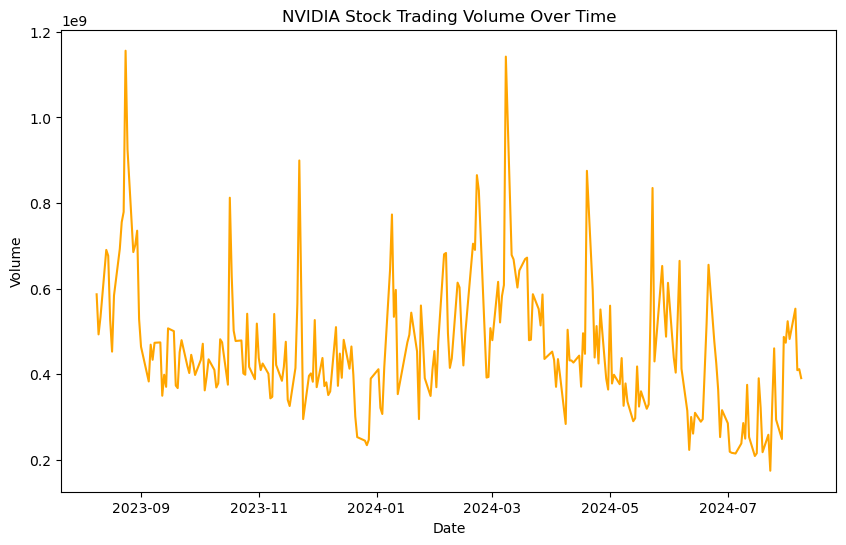

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['Volume'], color='orange')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


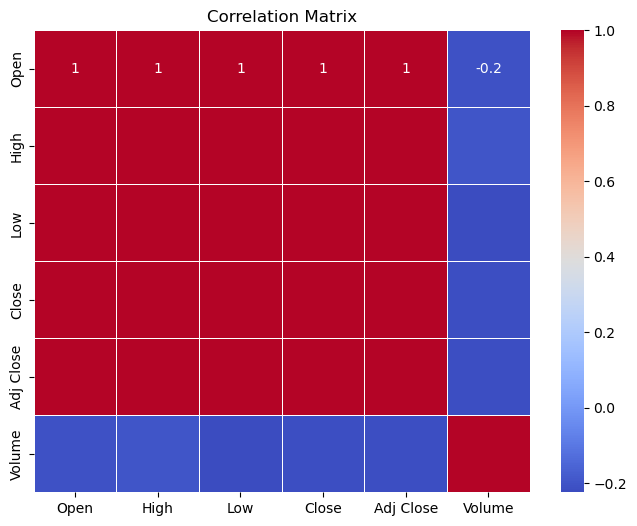

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



A correlation matrix is a table that shows the correlation coefficients between multiple variables. Each cell in the matrix represents the correlation between two variables. The values range from -1 to 1.This matrix suggests that in this particular dataset, the various price measures are strongly correlated with each other, while the trading volume has a weak and slightly inverse relationship with these prices.

Calculating rolling statistics such as the rolling mean and standard deviation to smooth out the time series data.

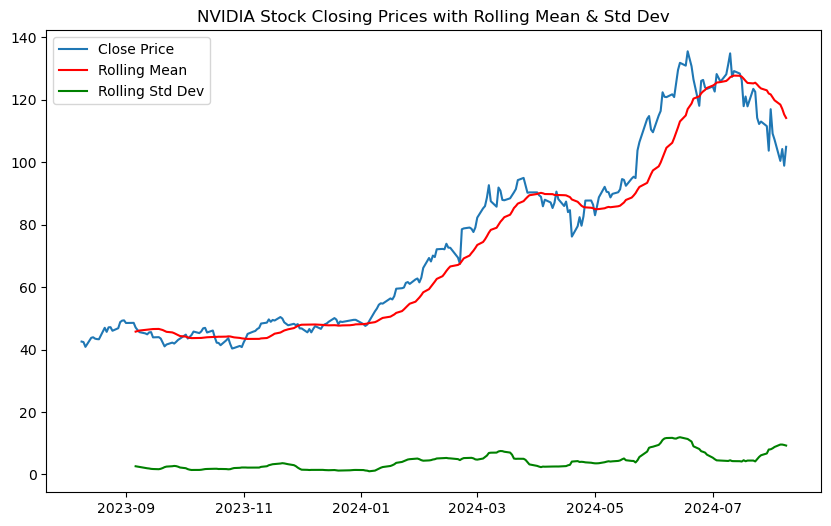

In [16]:
# Calculate rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=20).mean()
rolling_std = df['Close'].rolling(window=20).std()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='green', label='Rolling Std Dev')
plt.title('NVIDIA Stock Closing Prices with Rolling Mean & Std Dev')
plt.legend()
plt.show()


The rolling mean, also known as the moving average, is the average of a fixed number of data points in a time series. It helps to smooth out short-term fluctuations and highlight longer-term trends or cycles.
The rolling standard deviation measures the variability or volatility of the data over a specific window of time.


### Linear Regression

In [20]:
X = df[['Open']]
Y = df['Close']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [21]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [22]:
Y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')


RMSE: 2.1798446851576374
R²: 0.9933799662039116


An R² of 0.9934 suggests that 99.34% of the variability in the dependent variable is explained by your model. This is an excellent fit, meaning the model is very accurate in explaining the data.A lower RMSE value indicates a better fit, meaning the model's predictions are close to the actual values.